In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

### Define x_vector where y values will be sampled

In [2]:
npoints = 50
_x = np.linspace(-5, 5, npoints)

### Define kernel parameters, mean and kernel function

In [3]:
def mean_func(x_i):
    return 0

In [4]:
def kernel_func(x_i, x_j, sigma_l=1):
    return np.exp(-0.5 * ((x_i - x_j)/sigma_l) **2)

### Mean values and Kernel Matrix for x grid

In [5]:
# mean vector, K matrix for x_vector
_mean_i = np.empty(npoints)
_K = np.empty([npoints, npoints])
for i in range(npoints):
    _mean_i[i] = mean_func(_x[i])
    for j in range(npoints):
        _K[i,j] = kernel_func(_x[i], _x[j])
        
# K materix with different sigma length        
sigma_l=3
_K2 = np.empty([npoints, npoints])
for i in range(npoints):
    for j in range(npoints):
        _K2[i,j] = kernel_func(_x[i], _x[j], sigma_l)        

In [6]:
_mean_i.shape, _K.shape

((50,), (50, 50))

### Define GP based on mean and K matrix

In [7]:
n_prior_funcs = 10
priors = st.multivariate_normal.rvs(mean=_mean_i, cov=_K, size=n_prior_funcs)
priors2 = st.multivariate_normal.rvs(mean=_mean_i, cov=_K2, size=n_prior_funcs)

### Visualize GP Priors and effect of sigma_l

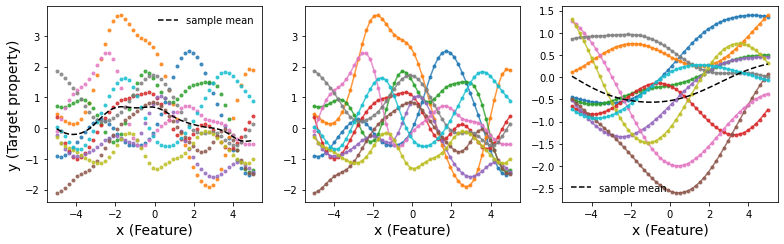

In [8]:
fig, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(11,3.5))

for idx in range(len(priors)):
    ax1.plot(_x, priors[idx], 'o', ms=3, alpha=0.8)
    ax2.plot(_x, priors[idx], '-o', ms=3, alpha=0.8)
    ax3.plot(_x, priors2[idx], '-o', ms=3, alpha=0.8)
    
ax1.plot(_x, np.mean(priors, axis=0), '--k', label='sample mean')  # Compute sample mean 
ax3.plot(_x, np.mean(priors2, axis=0), '--k', label='sample mean')  # Compute sample mean 

ax1.set_ylabel('y (Target property)', fontsize=14)
ax1.set_xlabel('x (Feature)', fontsize=14)
ax2.set_xlabel('x (Feature)', fontsize=14)
ax3.set_xlabel('x (Feature)', fontsize=14)

ax1.legend(frameon=False)
ax3.legend(frameon=False)

plt.tight_layout()

### Questions
1. We assumed mean function to be 0. Why is the sample mean at different values of x not exactly zero. 

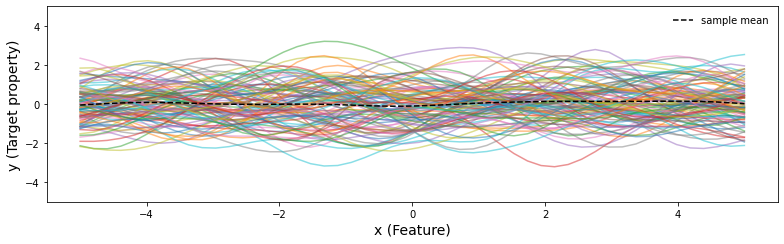

In [9]:
n_prior_funcs = 100
priors = st.multivariate_normal.rvs(mean=_mean_i, cov=_K, size=n_prior_funcs)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(11,3.5))

for idx in range(len(priors)):
    ax1.plot(_x, priors[idx], '-', ms=3, alpha=0.5)
    
ax1.plot(_x, np.mean(priors, axis=0), '--k', label='sample mean')  # Compute sample mean 

ax1.set_ylabel('y (Target property)', fontsize=14)
ax1.set_xlabel('x (Feature)', fontsize=14)

ax1.legend(frameon=False)

ax1.set_ylim(-5,5)

plt.tight_layout()

### Question
2. Why does most of the sampled functions are restricted to the y value being between (-2,2)?

### Given (Training) Data; Observations

In [10]:
# Real given X, y data
y = np.array([6, 0, 0])
x = np.array([0, 1, 2])
x_star = np.array([3])  # Test point 

### Make Prediction for complete x grid  (Noise free case)

In [11]:
n_train = len(y)
n_test = len(x_star)

K = np.empty((n_train, n_train))
for i in range(n_train):
    for j in range(n_train):
        K[i,j] = kernel_func(x[i], x[j])

K_star = np.empty((n_train, npoints))
for i in range(n_train):
    for j in range(npoints):
        K_star[i,j] = kernel_func(x[i], _x[j])

In [12]:
post_mean = K_star.T.dot(np.linalg.pinv(K)).dot(y)
post_var = _K - K_star.T.dot(np.linalg.pinv(K)).dot(K_star)
posteriors = st.multivariate_normal.rvs(mean=post_mean, cov=post_var, size=1000)

### Visualize posteriors / conditional probablities

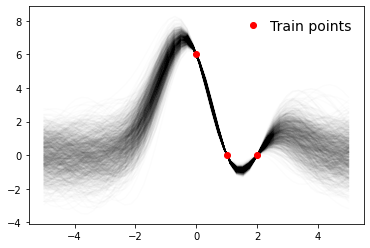

In [13]:
for i in range(1000):
    plt.plot(_x, posteriors[i], c='k', alpha=0.01)

plt.plot(x, y, 'ro', label='Train points')
plt.legend(frameon=False, fontsize=14, handletextpad=0.2)
plt.show()

### Question
3. Why does all the sampled posterior functions pass through the red dots?
4. Why most of the sampled posterior fuctions have y value between (-2,2) at x=4 and x=-4?

### Make Prediction for complete x grid  (Noise inclusive)

In [14]:
sigma_n = 0.3
K_noisy = K.copy()
for i in range(n_train):
        K_noisy[i,i] = K[i,i] + sigma_n**2

In [15]:
post_mean = K_star.T.dot(np.linalg.pinv(K_noisy)).dot(y)
post_var = _K - K_star.T.dot(np.linalg.pinv(K_noisy)).dot(K_star)
posteriors = st.multivariate_normal.rvs(mean=post_mean, cov=post_var, size=1000)

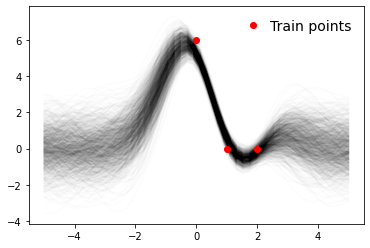

In [16]:
for i in range(1000):
    plt.plot(_x, posteriors[i], c='k', alpha=0.01)

plt.plot(x, y, 'ro', label='Train points')
plt.legend(frameon=False, fontsize=14, handletextpad=0.2)
plt.show()

### Question
5. Why does the sampled posterior functions do not perfectly pass through the observed training data in this case?